In [47]:
import numpy as np
import random
from four_rooms import FourRoomsEnvironment
from option import Option

""" Agent planning using Intra-Option Q-learning """
class IntraOptionQLearningAgent():
    def __init__(self, gamma=0.9, alpha=0.125):    
        self.options = \
         [Option("left"), Option("up"), Option("right"), Option("down"),
          Option("topleft->topright"), Option("topleft->botleft"),
          Option("topright->topleft"), Option("topright->botright"),
          Option("botleft->topleft"), Option("botleft->botright"),
          Option("botright->botleft"), Option("botright->topright")]
            
        self.gamma = gamma
        self.alpha = alpha
        self.current_option = None
        # Keep track of action number corresponding to last action taken
        self.last_action_taken = None
        
        n_states = 13 * 13
        n_options = len(self.options)
        self.Q = np.zeros((n_states, n_options))
        self.N = np.zeros((n_states, n_options))
        
    def epsilonGreedyPolicy(self, state, epsilon=0.1):
        if self.current_option is None:
            self._pickNewOptionEpsilonGreedily(state, epsilon)
        action, action_number = self.current_option.pickAction(state)
        # Record action number corresponding to last action taken
        self.last_action_taken = action_number
        return action
    
    def recordTransition(self, state, reward, next_state):
        # Update tables on every transition
        self._updateQValues(state, reward, next_state)
        if self.current_option.beta[next_state] == 1:
            self.current_option = None
        
    def _pickNewOptionEpsilonGreedily(self, state, epsilon):
        # Iterate over options, keeping track of all available options
        # and the index of best option seen so far
        available_options = []
        best_option_index = 0 
        s = self._sIdx(state)
        for i in xrange(len(self.options)):
            if self.options[i].I[state] == 1:
                available_options.append(self.options[i])
                if self.Q[s, i] > self.Q[s, best_option_index]:
                    best_option_index = i
        
        # Pick greedy option with probability (1 - epsilon)
        if random.uniform(0, 1) > epsilon:
            self.current_option = self.options[best_option_index]
        # Pick random action with probability epsilon
        else:
            self.current_option = random.choice(available_options)
        
    
    # Most of the work is done here
    def _updateQValues(self, state, reward, next_state):
        s1 = self._sIdx(state)
        s2 = self._sIdx(next_state)
        
        # List of all options consistent with last action taken
        consistent_options = []
        for option in self.options:
            if option.pi[state] == self.last_action_taken:
                consistent_options.append(option)
        
        # Update table for every option consistent with last action taken
        for option in consistent_options:
            o = self._oIdx(option)
            
            # Update Q table
            U = (1 - option.beta[next_state]) * self.Q[s2, o] + \
                    option.beta[next_state] * np.max(self.Q[s2])
            target = reward + self.gamma * U
            self.Q[s1, o] += self.alpha * (target - self.Q[s1, o])
    
    def _sIdx(self, state):
        return state[0] * 13 + state[1]
    
    def _oIdx(self, option):
        return self.options.index(option)

(101,)


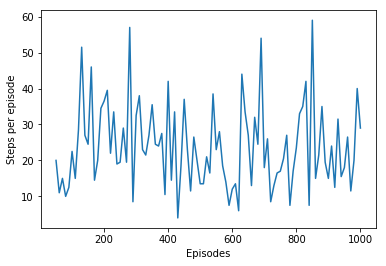

In [48]:
import matplotlib.pyplot as plt

env = FourRoomsEnvironment(start_loc="random")

def run_episode(verbose=False):
    n_steps = 0
    state = env.reset()
    while True:
        n_steps += 1
        action = agent.epsilonGreedyPolicy(state)
        if verbose:
            print("State = {}, Option = {}, Action = {}".format(
                state, agent.current_option, action))
        next_state, reward, done = env.step(action)
        agent.recordTransition(state, reward, next_state)
        state = next_state
        if done:
            return n_steps


n_repetitions = 2
n_episodes = 1001

average_len_episodes = []

for i in xrange(n_repetitions):
    agent = IntraOptionQLearningAgent()
    len_episodes = []
    
    for j in xrange(n_episodes):
        n_steps = run_episode()
        if j % 10 == 0:
            len_episodes.append(n_steps)
        
    average_len_episodes.append(len_episodes)
    
average_len_episodes = np.array(average_len_episodes).mean(axis=0)
print average_len_episodes.shape
    
plt.plot(xrange(50, n_episodes, 10), average_len_episodes[5:])
plt.xlabel("Episodes")
plt.ylabel("Steps per episode")
plt.show()

In [49]:
run_episode(verbose=True)
print
print(agent.Q[agent._sIdx((1,1))])
print(agent.Q[agent._sIdx((3,6))])
print(agent.Q[agent._sIdx((6,9))])
print(agent.Q[agent._sIdx((8,9))])
print(agent.Q[agent._sIdx((7,9))])

# Note : Agent learns not to use built-in options since they must 
# be suboptimal 

State = (3, 5), Option = right, Action = right
State = (3, 4), Option = right, Action = right
State = (3, 5), Option = right, Action = right
State = (2, 5), Option = down, Action = down
State = (3, 5), Option = right, Action = right
State = (4, 5), Option = up, Action = up
State = (3, 5), Option = right, Action = right
State = (3, 6), Option = right, Action = right
State = (3, 6), Option = right, Action = right
State = (3, 5), Option = topleft->botleft, Action = down
State = (3, 6), Option = right, Action = right
State = (3, 5), Option = right, Action = right
State = (3, 4), Option = right, Action = right
State = (3, 5), Option = right, Action = right
State = (3, 6), Option = right, Action = right
State = (3, 7), Option = topright->topleft, Action = left
State = (3, 8), Option = topright->topleft, Action = left
State = (3, 9), Option = topright->topleft, Action = left
State = (3, 8), Option = topright->topleft, Action = left
State = (2, 8), Option = topright->topleft, Action = left
Sta